# MBTI Project

By The Introverts 

#  For saving time, find and run step1,2,3 before modeling:

In [1]:
reset -fs

In [2]:
from nltk.stem.porter import *
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string 
import re
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
import numpy as np
plt.style.use('fivethirtyeight')

# Step1

In [3]:
# save time, run this to load the clean post
processed_post = pd.read_csv('data/mbti_preprocessed_1.csv')
processed_post.drop('Unnamed: 0',axis=1,inplace=True)
processed_post.head()

,type,posts,processed_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,moment sportscenter top ten play pr...
1,ENTP,'I'm finding the lack of me in these posts ver...,finding lack post alarming sex boring positi...
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one course say know blessing...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear enjoyed conversation day esoteric ...
4,ENTJ,'You're fired.|||That's another silly misconce...,fired another silly misconception approachi...


# Step2

### Posts Vectorized

Create a bag of words representation of each user by using tfidf

In [4]:
# TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(min_df=0.05, max_df=0.85, analyzer='word', ngram_range=(1, 2))
word_tfidf = vectorizer_tfidf.fit_transform(processed_post['processed_posts'])
word_tfidf_df = pd.DataFrame(data = word_tfidf.toarray(), columns = vectorizer_tfidf.get_feature_names())
# CountVectorizer
vectorizer_ct = CountVectorizer(stop_words='english',analyzer='word',input='content', 
                                 decode_error='ignore', max_df=0.48,min_df=5,
                                 token_pattern=r'\w{1,}', max_features=1625, ngram_range=(1,2)) # to compare two methods, I limit max_features=1625
word_ct = vectorizer_ct.fit_transform(processed_post['processed_posts'])
word_ct_df = pd.DataFrame(data = word_ct.toarray(), columns = vectorizer_ct.get_feature_names())

In [5]:
word_tfidf_df.head()

,ability,able,absolute,absolutely,abstract,accept,according,account,accurate,across,...,year ago,year old,yep,yes,yesterday,yet,young,younger,youtube,yup
0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.067997,0.000000,0.083075,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.00000,0.038307,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.12246,0.044400,0.000000,0.106856,0.0,0.0,0.0,0.0,0.064077,0.0,...,0.000000,0.063801,0.000000,0.060355,0.0,0.0,0.0,0.0,0.0,0.081823
3,0.00000,0.071834,0.066683,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.059121,0.000000,0.055929,0.0,0.0,0.0,0.0,0.0,0.000000


In [6]:
word_ct_df.head()

,ability,able,absolute,absolutely,abstract,accept,according,account,accurate,act,...,year ago,year old,yep,yes yes,yesterday,young,younger,youtube,yup,zone
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,2,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# Step3

In [7]:
mbti = pd.read_csv("data/mbti_FE.csv")
mbti.head()

,type,posts,EorI,NorS,TorF,JorP,avg_comment_length,comment_length_var,Sentiment,Ellipses,Exclamation,Question,Links,Picture,Emojies,Upper
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,0,0,0,0,11.12,135.2900,0.996199,8,3,18,24,6,4,13
1,ENTP,'I'm finding the lack of me in these posts ver...,1,0,1,1,23.40,187.4756,0.999350,18,0,5,9,8,14,82
2,INTP,'Good one _____ https://www.youtube.com/wat...,0,0,1,1,16.72,180.6900,0.999250,13,4,12,4,0,10,26
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",0,0,1,0,21.28,181.8324,0.999250,23,3,11,2,0,0,57
4,ENTJ,'You're fired.|||That's another silly misconce...,1,0,1,0,19.34,196.4576,0.995699,20,1,10,6,2,1,35


# Plotting ROC Functions

In [8]:
from helperfunctions.PrettyConfusionMatrix import print_cm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import time
import warnings
warnings.filterwarnings('ignore')
from random import choice
import lightgbm as lgb
import gc
from xgboost.sklearn import XGBClassifier

In [73]:
from collections import defaultdict
from sklearn.metrics import roc_curve, auc

In [105]:
def model(model, X, target, nsplits=4):
    '''
    Estimates probabilities for observations being in class 1.

    Function returns a dictionary with keys of class 'EorI', 'NorS', 'TorF', and 'JorP'.
    Within each class value contains a list of probabilities for each split.

    Example: total_probabilities['EorI'] contains [[p1,p2,p3...],[p1,p2,p3...],...]
    '''
    
    kf = StratifiedShuffleSplit(n_splits=nsplits, random_state=420)
    total_probabilities = defaultdict()

    t = time.time()
    for col in target.columns:
        y = target[col]
        all_auc = []
        all_accuracies = []
        total_probabilities[col] = []
        for train, test in kf.split(X, y):
            X_train, X_test, y_train, y_test = X.loc[train], X.loc[test], y[train], y[test]
            model.fit(X_train, y_train)
            probabilities = model.predict_proba(X_test)
            score = probabilities[:, 1]
            preds = model.predict(X_test)
            total_probabilities[col].append((score, y_test))
            all_auc.append(roc_auc_score(y_test,score))
            all_accuracies.append(accuracy_score(y_test,preds))
        print(f'Average AUC: {np.mean(all_auc):.3f}; Average Accuracy: {np.mean(all_accuracies):.3f}')
        print_cm(confusion_matrix(y_test, preds,[1,0]),['1','0']) # prints last split only
    print(f"Time use:{time.time()-t:.3f}s")    

    return average_roc(total_probabilities)

In [68]:
def average_roc(probabilities):
    '''
    Calculates average ROC curves over n_splits of stratified shuffle splits. Not all thresholds
    are chosen equally, thus different splits have different array lengths of FPR and TPR. In 
    order to average we need the same array length. We will interpolate tpr values between 0 and 1
    in 0.1 increments. This gives an average of an *estimated* ROC curve. 

    Function returns a dictionary with keys of class 'EorI', 'NorS', 'TorF', and 'JorP'.  
    Within each class value contains another dictionary with keys 'base_fpr', 'est_tpr', and 'auc'
    'est_tpr' is the average TPR across all splits and 'auc' is the average AUC across all splits.
    '''
    avg_roc = defaultdict() 
    base_fpr = np.linspace(0,1,101)

    for types in probabilities.keys():
        avg_roc[types] = {'base_fpr':base_fpr, 'est_tpr':np.zeros(101), 'auc':[]} 
        total_splits = len(probabilities[types]) 
        for split in probabilities[types]:
            y_scores = split[0] # split[0] is the model probability of predicting a 1
            y_true = split[1] # split[1] is the true test values for that split
            fpr, tpr, thresholds = roc_curve(y_true,y_scores) # used for interpolation
            avg_roc[types]['est_tpr'] += np.interp(base_fpr, fpr, tpr) # Add est_tpr 
            avg_roc[types]['auc'].append(auc(fpr, tpr)) # Append AUC 
        avg_roc[types]['est_tpr'] = avg_roc[types]['est_tpr'] / total_splits # Average TPRs 
        avg_roc[types]['auc'] = np.mean(avg_roc[types]['auc']) # Average AUCs 
        
    return avg_roc

In [94]:
def plot_avg_roc(model_list, model_names):
    '''
    From model list and model names, plots ROC curves for each class on a 2x2 grid. 
    '''
    
    fig, axs = plt.subplots(2,2, figsize=(15, 15), facecolor='w', edgecolor='b')
    axs = axs.flatten()
    abbrev = {'EorI':'Extroversion vs. Introversion', 'NorS': 'Intuition vs. Sensing',
                     'TorF': 'Thinking vs. Feeling','JorP': 'Judging vs. Perceiving'}
    colors = ['b','g','c','m','y']

    for x in range(len(model_list)):
        roc_data = model_list[x]
        types = list(roc_data.keys())

        for i in range(len(types)):
            base_fpr = roc_data[types[i]]['base_fpr']
            est_tpr = roc_data[types[i]]['est_tpr']
            auc = roc_data[types[i]]['auc']
            axs[i].plot(base_fpr, est_tpr, colors[x], linewidth=1, label = '%s = %0.2f' %(model_names[x], auc))
            axs[i].plot([0, 1], [0, 1],'r--', linewidth = 1)
            axs[i].legend(loc = 'lower right', title = 'Avg AUC Scores')
            axs[i].set_xlim([0, 1])
            axs[i].set_ylim([0, 1])
            axs[i].set_ylabel('True Positive Rate')
            axs[i].set_xlabel('False Positive Rate')
            axs[i].set_title('ROC for %s'  % abbrev[types[i]])

# Running Sklearn Models and Plotting ROC

In [27]:
# initialize
MNB = MultinomialNB()
LR = LogisticRegression(random_state=0, max_iter=10)
SVM = SVC(kernel='linear')
target = mbti.iloc[:,2:6]
# X_tf = np.column_stack((mbti.iloc[:,6:].drop('Sentiment',axis=1),word_tfidf_df))
# X_ct = np.column_stack((mbti.iloc[:,6:].drop('Sentiment',axis=1),word_ct_df))

X_tf = pd.concat([mbti.iloc[:,6:],word_tfidf_df],axis=1)
X_ct = pd.concat([mbti.iloc[:,6:],word_ct_df],axis=1)

#### Run models the same way, except now store probability results in `name_model` 

In [112]:
lr_tf_model = model(LR, X_tf, target, nsplits=5)

Average AUC: 0.612; Average Accuracy: 0.769
              1     0 
        1   5.0 195.0 
        0   3.0 665.0 
Average AUC: 0.550; Average Accuracy: 0.862
              1     0 
        1   0.0 120.0 
        0   0.0 748.0 
Average AUC: 0.723; Average Accuracy: 0.662
              1     0 
        1 221.0 177.0 
        0 116.0 354.0 
Average AUC: 0.558; Average Accuracy: 0.604
              1     0 
        1 518.0   6.0 
        0 339.0   5.0 
Time use:13.455s


In [113]:
lr_ct_model = model(LR, X_ct, target, nsplits=5)

Average AUC: 0.725; Average Accuracy: 0.773
              1     0 
        1  11.0 189.0 
        0  13.0 655.0 
Average AUC: 0.707; Average Accuracy: 0.859
              1     0 
        1   1.0 119.0 
        0   2.0 746.0 
Average AUC: 0.843; Average Accuracy: 0.768
              1     0 
        1 299.0  99.0 
        0 115.0 355.0 
Average AUC: 0.706; Average Accuracy: 0.674
              1     0 
        1 429.0  95.0 
        0 193.0 151.0 
Time use:11.094s


In [114]:
mnb_tf_model = model(MNB, X_tf, target, nsplits=5)

Average AUC: 0.599; Average Accuracy: 0.667
              1     0 
        1  75.0 125.0 
        0 171.0 497.0 
Average AUC: 0.557; Average Accuracy: 0.712
              1     0 
        1  37.0  83.0 
        0 151.0 597.0 
Average AUC: 0.682; Average Accuracy: 0.636
              1     0 
        1 278.0 120.0 
        0 202.0 268.0 
Average AUC: 0.561; Average Accuracy: 0.572
              1     0 
        1 329.0 195.0 
        0 194.0 150.0 
Time use:3.279s


In [115]:
mnb_ct_model = model(MNB, X_ct, target, nsplits=5)

Average AUC: 0.709; Average Accuracy: 0.704
              1     0 
        1 109.0  91.0 
        0 161.0 507.0 
Average AUC: 0.700; Average Accuracy: 0.734
              1     0 
        1  60.0  60.0 
        0 163.0 585.0 
Average AUC: 0.812; Average Accuracy: 0.738
              1     0 
        1 305.0  93.0 
        0 137.0 333.0 
Average AUC: 0.647; Average Accuracy: 0.623
              1     0 
        1 360.0 164.0 
        0 164.0 180.0 
Time use:3.330s


#### Create `model_list` and `model_names` for plotting using the `plot_avg_roc` function:

In [116]:
model_list = [lr_tf_model, lr_ct_model, mnb_tf_model, mnb_ct_model]
model_names = ['LR TFIDF', 'LR Word ct','MNB TFIDF', 'MNB Word ct']

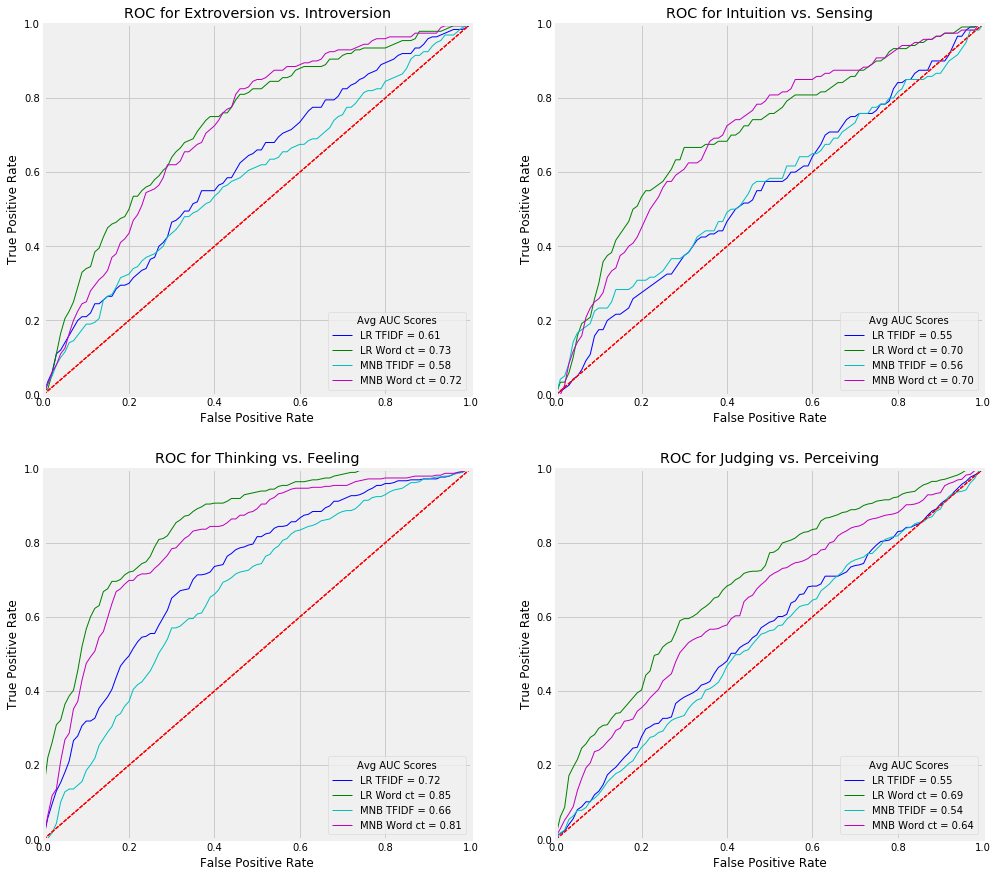

In [117]:
plot_avg_roc(roc_list,model_names)